In [1]:
import astrospice

import numpy as np 
from astropy.time import Time, TimeDelta
from astropy import units as u
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/Users/laura.hayes/opt/miniconda3/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [14]:
tstart = Time("2021-01-01T00:00:00.000")
tend = Time("2022-06-01T00:00:00.000")
times = Time(np.arange(tstart, tend, TimeDelta(1*u.day)))

In [15]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", times)
earth_coords = astrospice.generate_coords("earth", times)
sun_coords = astrospice.generate_coords("sun", times)

In [16]:
solo_coords_hci = solo_coords.transform_to(frames.HeliocentricInertial)
earth_coords_hci = earth_coords.transform_to(frames.HeliocentricInertial)

In [17]:
solo_coords_hgs = solo_coords.transform_to(frames.HeliographicStonyhurst)
earth_coords_hgs = earth_coords.transform_to(frames.HeliographicStonyhurst)
sun_coords_hgs = sun_coords.transform_to(frames.HeliographicStonyhurst)

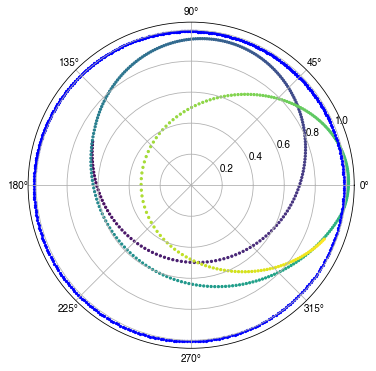

In [18]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='polar')
ax.scatter(solo_coords_hci.lon.to(u.rad), solo_coords_hci.distance.to(u.au), c=times.jd, s=5)
ax.scatter(earth_coords_hci.lon.to(u.rad), earth_coords_hci.distance.to(u.au), s=5, color="blue")
plt.show()

In [19]:
dt = np.array([t.total_seconds() for t in (times.datetime - times[0].datetime)])

In [23]:
dates.date2num(times.datetime)[0:10]

array([18628., 18629., 18630., 18631., 18632., 18633., 18634., 18635.,
       18636., 18637.])

In [24]:
ticks = dates.date2num(times.datetime)

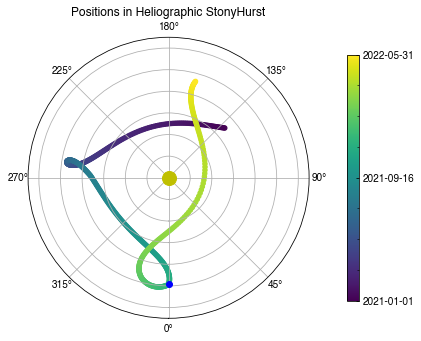

In [26]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='polar')
im = ax.scatter(solo_coords_hgs.lon.to(u.rad), 
           solo_coords_hgs.radius.to(u.au), c=ticks, s=20)
ax.plot(earth_coords_hgs[0].lon.to(u.rad), 
           earth_coords_hgs[0].radius.to(u.au), ms=12, marker='.', color="blue")

ax.plot(sun_coords_hgs[0].lon.to(u.rad), 
        sun_coords_hgs[0].radius.to(u.AU), marker='o', color='y', label="Sun",  ms=14)

ax.set_theta_zero_location("S")
_ = ax.set_yticklabels([])

ax.set_rlim(0, 1.3)
ax.set_title("Positions in Heliographic StonyHurst")

cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.6)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar

plt.tight_layout()
#plt.savefig("orbit_from_earth.png", dpi=300, facecolor='w', bbox_inches="tight")